In [1]:
%matplotlib inline
%config Completer.use_jedi = False # to use autocomplete
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
import json
import pandas as pd
from random import seed
RANDOM_SEED=0
seed(RANDOM_SEED)
from itertools import combinations
import itertools
plt.rcdefaults()
# plt.rcParams.update({'font.family':'fantasy'})

In [2]:
def path_leaf(path): # get filename(with extension) from path
    head, tail = os.path.split(path)
    return tail or os.path.basename(head)


def file_in_folder(folder_path, flag=1): # get files in given folder, return list of filepath and filename
    file_list = []
    file_name = []
    for(dirpath, dirnames, filenames) in os.walk(folder_path):
#         print(filenames)
        
        for i in filenames:
            try:
                file_list += [dirpath + os.sep + i]
                file_name += [i]
            except:
                continue
        if flag == 0:
            break
        file_list.sort(key=path_leaf)
        file_name.sort()
    return [file_list, file_name]

In [3]:
file_list, _ = file_in_folder('.')
file_list = [i for i in file_list if '.json' in i]
file_list

['./exp_bounds_deterioration.json',
 './exp_bounds_normalized.json',
 './med_bounds_deterioration.json',
 './med_bounds_normalized.json',
 './med_bounds_transfer.json']

In [4]:
color_dic = {'g': 'tab:blue', 'ab': 'tab:orange', 'dg': 'tab:green', 'abg': 'tab:red', 'abdg': 'tab:purple', 
           'RF': 'tab:brown', 'Random Forest': 'tab:brown', 'kernel_ridge_rbf': 'tab:pink', 'EU_iso': 'tab:gray'
          }
plt.rcdefaults()
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('text', usetex=True)
def change_to_greek(models):
    dic = {'g': r'$\gamma$', 'ab': r'$\alpha\beta$', 'dg': r'$\delta\gamma$', 
           'abg': r'$\alpha\beta\gamma$', 'abdg': r'$\alpha\beta\delta\gamma$', 
           'RF': 'RF', 'NN': 'NN', 'Random Forest': 'RF', 'Neural Net': 'NN', 
           'kernel_ridge_poly': 'OLS-poly', 'kernel_ridge_rbf': 'KR', 'EU_expo': 'EU-CARA', 'EU_iso': 'EU'
          }
    res = []
    for i in models:
        res.append(dic[i])
    return res

def plot_intervals(content, keyword=None, savepath=None):
    lw = 2.5
    capwidth=0.2
    plot_dic = {}
    model = ['g', 'ab', 'dg', 'abg', 'abdg', 'RF', 'Ridge', 'EU']
    num_model = len(model)
    count = 0
    for dic in content:
        if 'type' in dic.keys() and dic['type'] != 'New':
            continue
        cur_model = dic['model']
        if cur_model not in model:
            continue
        if cur_model == 'Ridge': 
            cur_model = 'kernel_ridge_rbf'
        elif cur_model == 'EU':
            cur_model = 'EU_iso'
        # print(cur_model)
        # print(dic['ub'] - dic['lb'])
        x = np.linspace(dic['lb'], dic['ub'], 100)
        y = [num_model-1-count]*100
        if dic['ub'] - dic['lb'] in plot_dic.keys():
            plot_dic[dic['ub'] - dic['lb'] + 1e-8] = {'x': x, 'y': y, 'model': cur_model}
        else:
            plot_dic[dic['ub'] - dic['lb']] = {'x': x, 'y': y, 'model': cur_model}
    # print(plot_dic.keys())

    model_order = []
    for key in sorted(plot_dic.keys()):
        x = plot_dic[key]['x']
        y = [len(model)-1-count]*100
        model_order.append(plot_dic[key]['model'])
        plt.plot(x, y, lw=lw, color=color_dic[plot_dic[key]['model']])
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model_order)), change_to_greek(reversed(model_order)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()



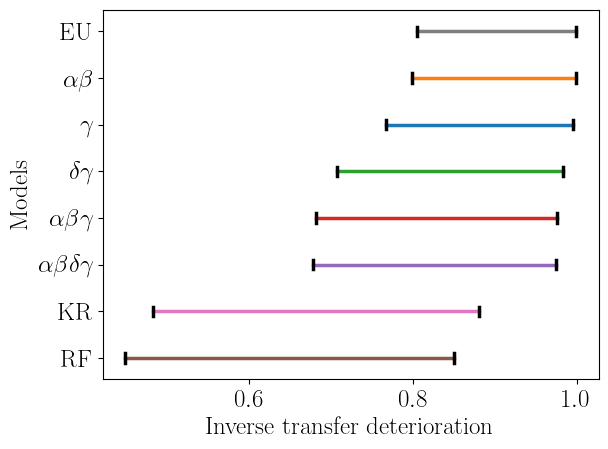

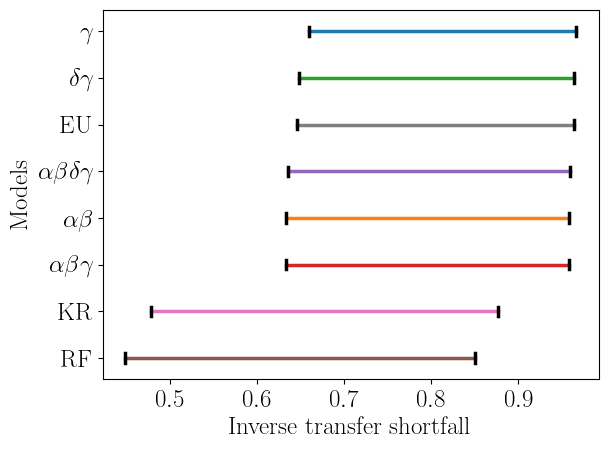

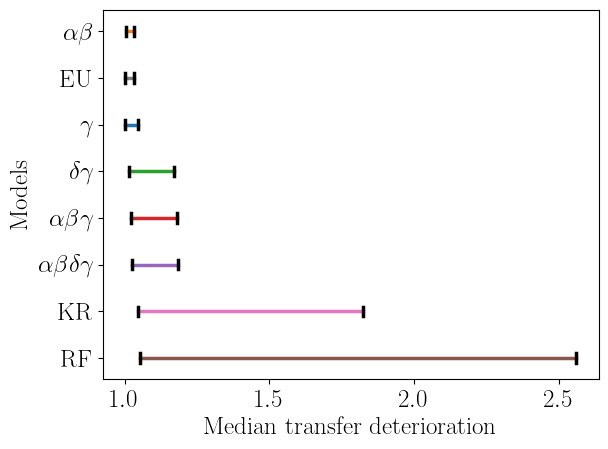

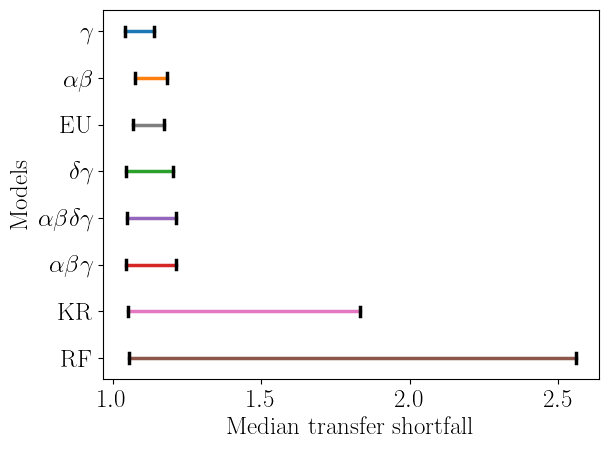

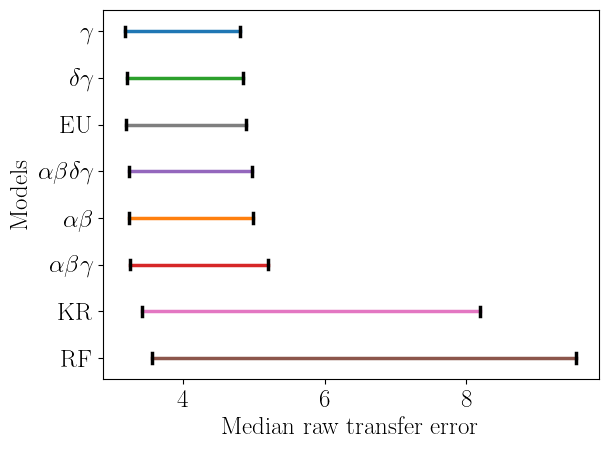

In [5]:

# print(file_list)
file_name_keyword = {
    './exp_bounds_deterioration.json': 'Inverse transfer deterioration', 
    './exp_bounds_normalized.json': 'Inverse transfer shortfall', 
    './med_bounds_deterioration.json': 'Median transfer deterioration', 
    './med_bounds_transfer.json': 'Median raw transfer error', 
    './med_bounds_normalized.json': 'Median transfer shortfall', 
}
file_name_savepath = {
    './exp_bounds_deterioration.json': 'exp_bounds_deterioration', 
    './exp_bounds_normalized.json': 'exp_bounds_normalized', 
    './med_bounds_deterioration.json': 'median_bounds_deterioration', 
    './med_bounds_transfer.json': 'median_bounds_transfer', 
    './med_bounds_normalized.json': 'median_bounds_normalized', 
}

i = 2
for i in range(len(file_list)):
    with open(file_list[i], 'r') as f:
        content = json.load(f)
    # type(content)
    # print(len(content))
    keyword = file_name_keyword[file_list[i]]
    savepath = file_name_savepath[file_list[i]]
    savepath = f'{savepath}.pdf'
    plot_intervals(content=content, keyword=keyword, savepath=savepath)
# content

# plot intervals

In [154]:
ML_models = ['RF', 'NN', 'kernel_ridge_poly', 'kernel_ridge_rbf']
ML_models = ['RF', 'kernel_ridge_rbf']
color_dic = {'g': 'tab:blue', 'ab': 'tab:orange', 'dg': 'tab:green', 'abg': 'tab:red', 'abdg': 'tab:purple', 
           'RF': 'tab:brown', 'Random Forest': 'tab:brown', 'kernel_ridge_rbf': 'tab:pink', 'EU_iso': 'tab:gray'
          }
def change_to_greek(models):
    dic = {'g': r'$\gamma$', 'ab': r'$\alpha\beta$', 'dg': r'$\delta\gamma$', 
           'abg': r'$\alpha\beta\gamma$', 'abdg': r'$\alpha\beta\delta\gamma$', 
           'RF': 'RF', 'NN': 'NN', 'Random Forest': 'RF', 'Neural Net': 'NN', 
           'kernel_ridge_poly': 'OLS-poly', 'kernel_ridge_rbf': 'KR', 'EU_expo': 'EU-CARA', 'EU_iso': 'EU'
          }
    res = []
    for i in models:
        res.append(dic[i])
    return res

def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plt.plot(x, y, lw=lw)
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model)), change_to_greek(reversed(model)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    plot_dic = {}
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plot_dic[res['higher'][i] - res['lower'][i]] = {'x': x, 'y': y, 'model': res['model'][i]}
    
    model_order = []
    for key in sorted(plot_dic.keys()):
        x = plot_dic[key]['x']
        y = [len(model)-1-count]*100
        model_order.append(plot_dic[key]['model'])
        plt.plot(x, y, lw=lw, color=color_dic[plot_dic[key]['model']])
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model_order)), change_to_greek(reversed(model_order)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

## 9-95 percentile

In [155]:
plt.rcdefaults()
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('text', usetex=True)
lower_percent = 5
higher_percent = 95
transfer_error = 'Transfer error'
normalized_transfer = 'Normalized transfer error'
same_model_transfer = 'Transfer deterioration'
# fol = '../stack_figures/to_stack'
fol = '.'

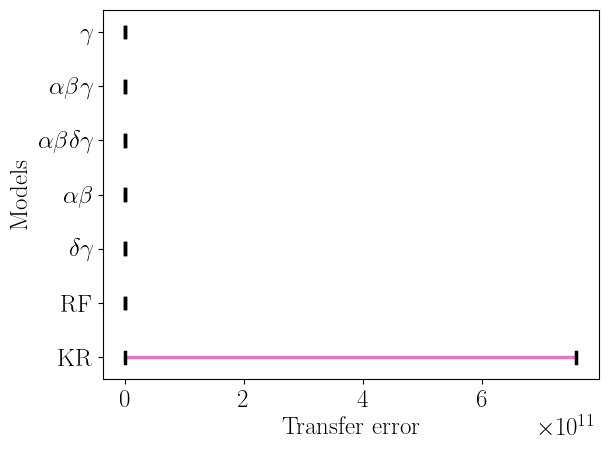

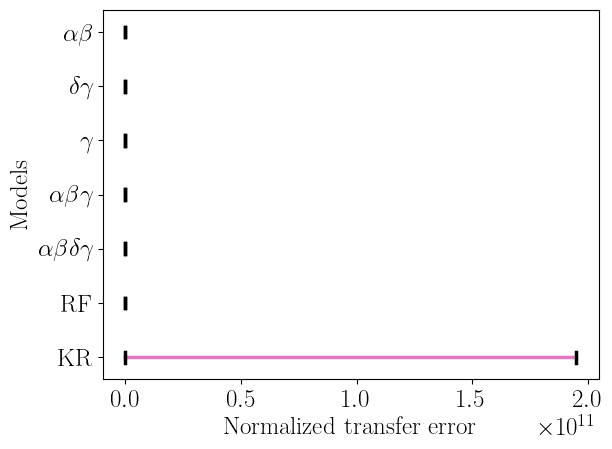

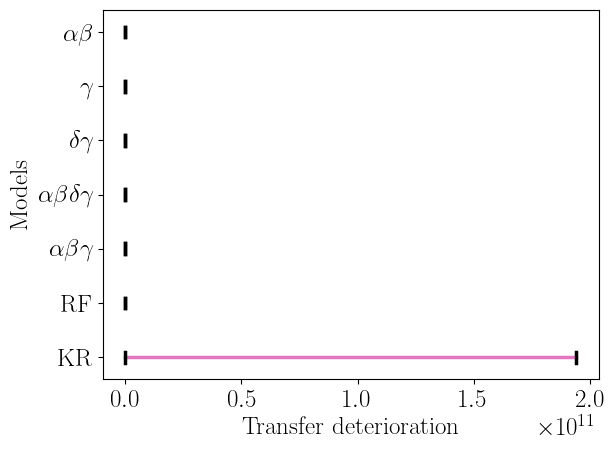

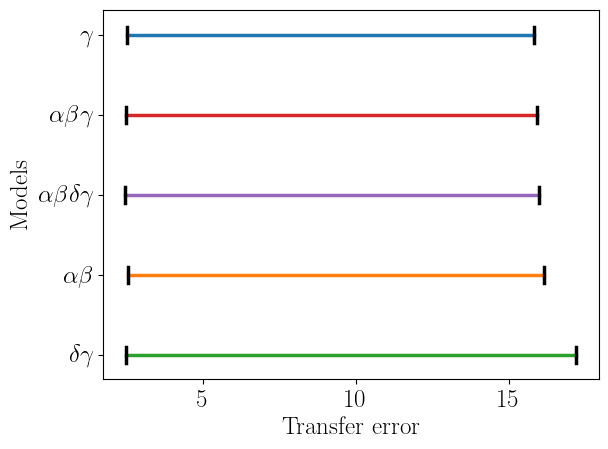

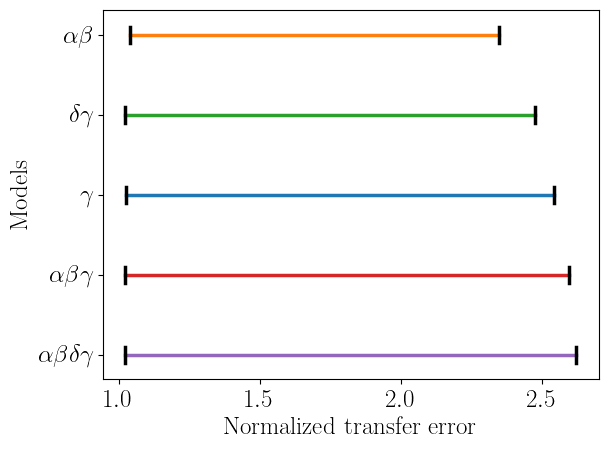

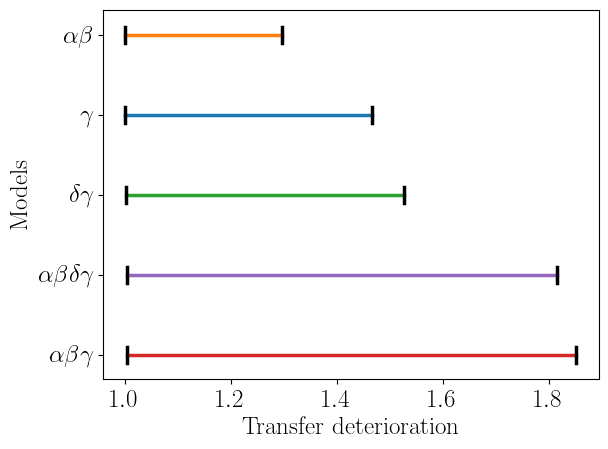

In [156]:
plot_intervals(all_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(all_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(all_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

plot_intervals(CPT_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(CPT_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(CPT_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

In [157]:
!pwd

/Users/chaofeng/Documents/Work/Northwestern/Research/econ/lottery/scripts/20230208/produce_figures/single_train_domain


## 10-90 percentile

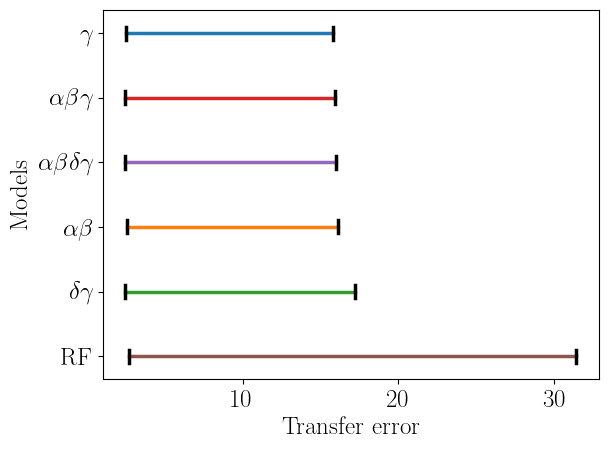

In [161]:
# plt.rcdefaults()
# plt.rcParams.update({'font.size':12})
# plt.rcParams.update({'font.family':'Times New Roman'})
lower_percent = 5
higher_percent = 95
# transfer_error = 'Transfer error'
# normalized_transfer = 'Normalized transfer error'
# same_model_transfer = 'Transfer deterioration'
plot_intervals(['g', 'ab', 'dg', 'abg', 'abdg', 'RF'], raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=None)

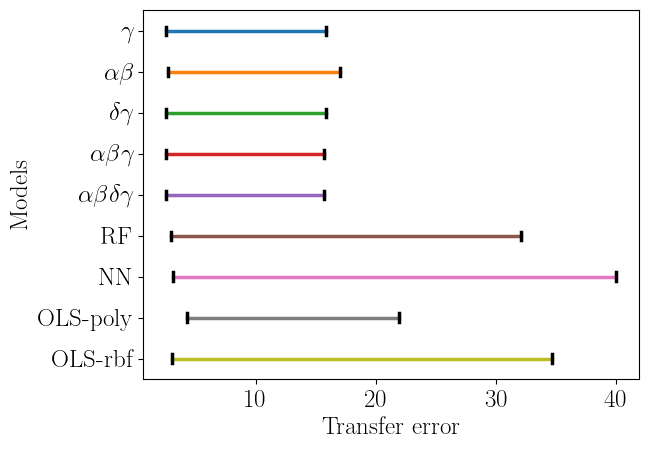

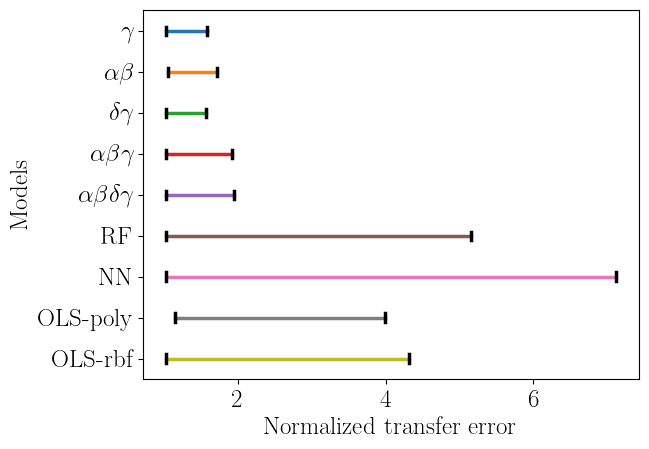

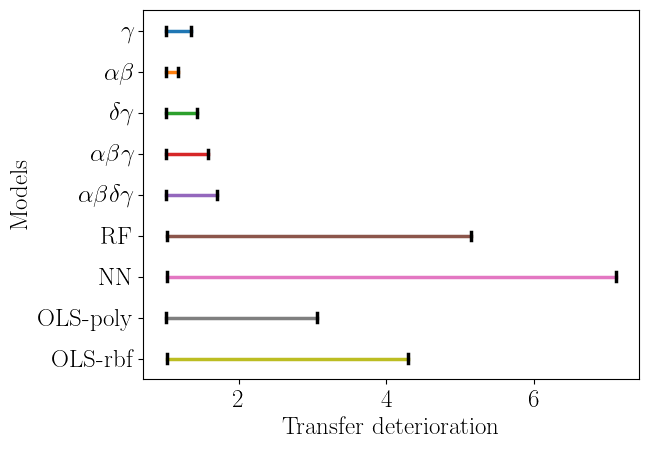

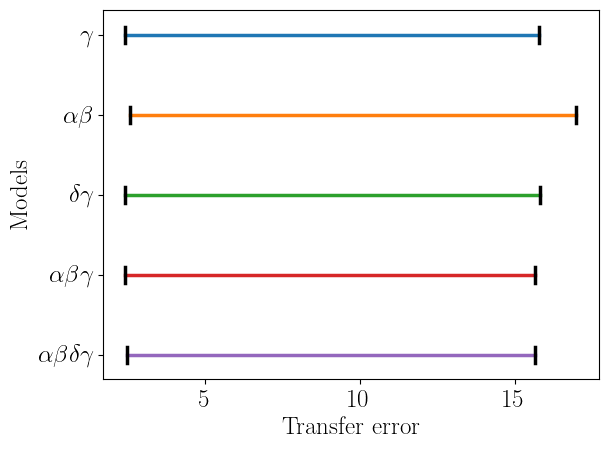

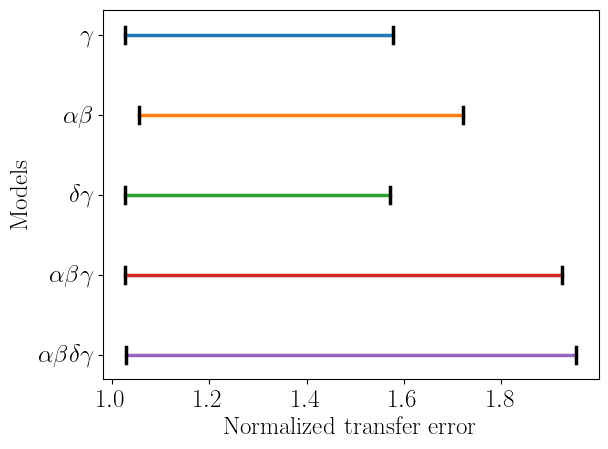

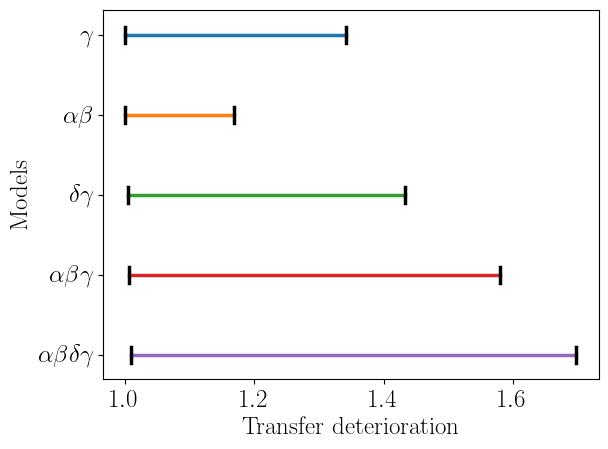

In [39]:
plot_intervals(all_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(all_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(all_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

plot_intervals(CPT_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(CPT_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(CPT_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

# Only CPT

In [23]:
%%time
# CPT_raw_transfer_dic = {}
median_of_list = ['max', 95, 90, 75, 50, 25, 10, 5, 'min']

# CPT_raw_transfer_dic = get_median_transfer_error(all_folders, all_contents=all_content, normalize=False, in_sample_dic=in_sample_res, use_best_in_sample=False, median_of=median_of, median_of_list=median_of_list, model_to_see=CPT_models)

CPT_best_normalize_dic = {}

CPT_best_normalize_dic = get_median_transfer_error(all_folders, normalize=True, in_sample_dic=in_sample_res, use_best_in_sample=True, median_of_list=median_of_list, model_to_see=CPT_models)

# CPT_same_model_normalize_dic = {}

# CPT_same_model_normalize_dic = get_median_transfer_error(all_folders, all_contents=all_content, normalize=True, in_sample_dic=in_sample_res, use_best_in_sample=False, median_of=median_of, median_of_list=median_of_list, model_to_see=CPT_models)

../../mse_in_sample_transfer/in_sample/32
../../mse_in_sample_transfer/in_sample/35
../../mse_in_sample_transfer/in_sample/34
../../mse_in_sample_transfer/in_sample/33
../../mse_in_sample_transfer/in_sample/.DS_Store
../../mse_in_sample_transfer/in_sample/20
../../mse_in_sample_transfer/in_sample/18
../../mse_in_sample_transfer/in_sample/27
../../mse_in_sample_transfer/in_sample/9
../../mse_in_sample_transfer/in_sample/0
../../mse_in_sample_transfer/in_sample/11
../../mse_in_sample_transfer/in_sample/7
../../mse_in_sample_transfer/in_sample/29
../../mse_in_sample_transfer/in_sample/16
../../mse_in_sample_transfer/in_sample/42
../../mse_in_sample_transfer/in_sample/6
../../mse_in_sample_transfer/in_sample/28
../../mse_in_sample_transfer/in_sample/17
../../mse_in_sample_transfer/in_sample/1
../../mse_in_sample_transfer/in_sample/10
../../mse_in_sample_transfer/in_sample/19
../../mse_in_sample_transfer/in_sample/26
../../mse_in_sample_transfer/in_sample/8
../../mse_in_sample_transfer/in_s

## 5-95 percentile

In [24]:
# plt.rcdefaults()
# plt.rcParams.update({'font.size':12})
# plt.rcParams.update({'font.family':'Times New Roman'})
lower_percent = 5
higher_percent = 95
# transfer_error = 'Transfer error'
# normalized_transfer = 'Normalized transfer error'
# same_model_transfer = 'Transfer deterioration'

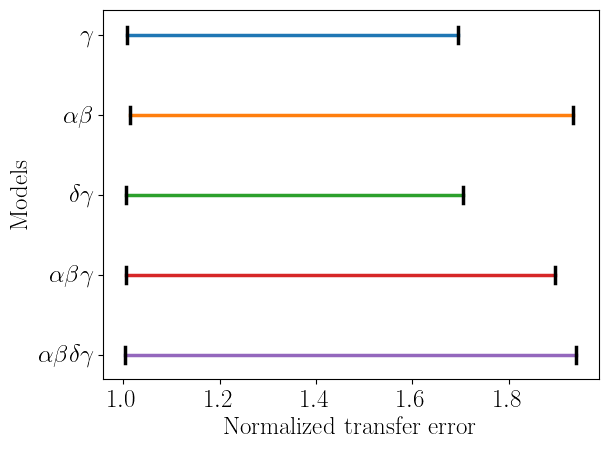

In [25]:
# plot_intervals(CPT_models, CPT_raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'images/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(CPT_models, CPT_best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
# plot_intervals(CPT_models, CPT_same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'images/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

## 10-90 percentile

In [43]:
# plt.rcdefaults()
# plt.rcParams.update({'font.size':12})
# plt.rcParams.update({'font.family':'Times New Roman'})
lower_percent = 10
higher_percent = 90
# transfer_error = 'Transfer error'
# normalized_transfer = 'Normalized transfer error'
# same_model_transfer = 'Transfer deterioration'

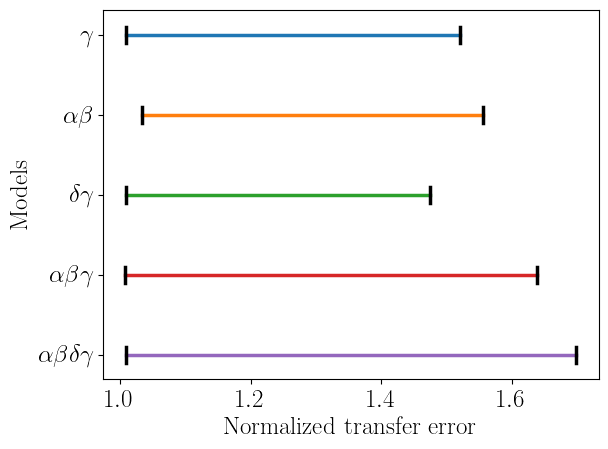

In [44]:
# plot_intervals(CPT_models, CPT_raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'images/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(CPT_models, CPT_best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
# plot_intervals(CPT_models, CPT_same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'images/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')